In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='AppleGothic')

path1 = './일별 대여 건수(2018~2019.03).csv'
path2 = './일별 대여 건수(2019.4~5).xlsx'
path3 = './일별 대여 건수20190601_20191130.xlsx'
path4 = './일별 이용량2019.12.01~2020.05.31.xlsx'
path5 = './일별이용량2020.06.01~2020.06.30.xlsx'
path6 = './일별 대여 건수2020.07.01~2021.01.31.csv'
path7 = './일별 대여 건수21.02.01~21.06.30.csv'

df1 = pd.read_csv(path1,encoding='euc-kr',thousands = ',')
df2 = pd.read_excel(path2,thousands = ',')
df3 = pd.read_excel(path3,thousands = ',')
df4 = pd.read_excel(path4,thousands = ',')
df5 = pd.read_excel(path5,thousands = ',')
df6 = pd.read_csv(path6,encoding='euc-kr',thousands = ',')
df7 = pd.read_csv(path7,encoding='euc-kr',thousands = ',')

In [2]:
df1.rename(columns={'대여일자':"대여일시"},inplace=True)
df2.rename(columns={'대여일자':"대여일시"},inplace=True)

df6 = df6.drop( ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1)

df7 = df7.drop( ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5'],axis=1)
df7.dropna(axis=0,inplace=True)


In [3]:
df = pd.concat([df1,df2,df3,df4,df6,df7])
df.duplicated().sum()


148

In [4]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()
#중복이 잘 제거 된것을 확인

0

In [5]:
df['대여건수'] = df['대여건수'].apply(pd.to_numeric)
df['대여일시'] = pd.to_datetime(df['대여일시'],format='%Y-%m-%d')

df['year'] = df['대여일시'].dt.year
df['month'] = df['대여일시'].dt.month
df['day'] = df['대여일시'].dt.dayofweek

df.rename({'대여일시':'날짜'},axis=1,inplace=True)
df = df.set_index('날짜')


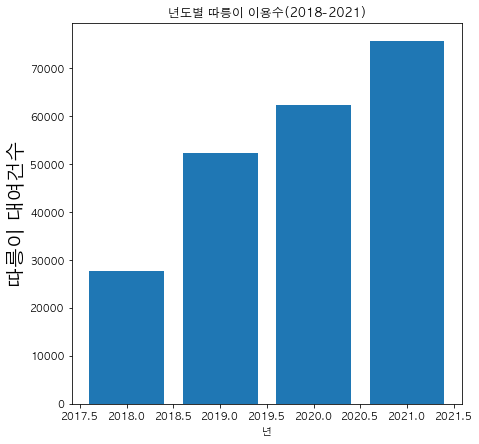

In [6]:
df_year_mean1 = df.groupby(['year']).mean()
plt.figure(figsize=(7,7))
plt.bar(range(2018,2022), df_year_mean1.대여건수)
plt.title("년도별 따릉이 이용수(2018-2021)")
plt.xlabel("년")
plt.ylabel("따릉이 대여건수",fontsize=20)
plt.show()

<Figure size 720x720 with 0 Axes>

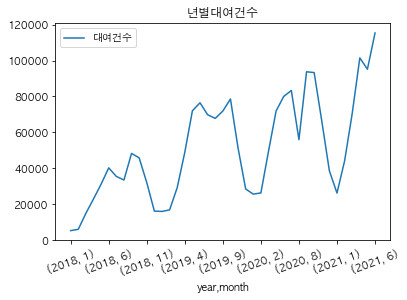

In [7]:
df_year_mean = df.groupby(['year','month']).mean().drop('day',axis=1)
plt.figure(figsize=(10,10))
df_year_mean.plot()
plt.xticks(rotation=20)
plt.title('년별대여건수')
plt.show()



위의 그래프에서 월별로 그래프의 공통적인 굴곡이 생겨서 월별 평균 따릉이 대여 건수에 대하여 분석을 해 보았다.
그래프 분석 결과 봄(5월-6월)과 가을철(9-10월)에 가장 따릉이 대여건수가 높고
겨울철과 한 여름에 따릉이 대여수가 감소한다.
따라서 따릉이 대여수는 날씨(계절)에 영향을 많이 받는다는 것을 알 수 있다.


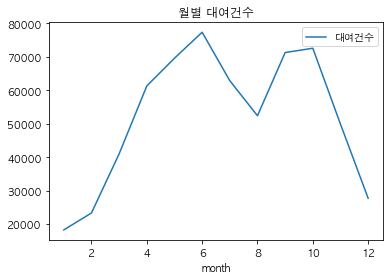

In [8]:
print('위의 그래프에서 월별로 그래프의 공통적인 굴곡이 생겨서 월별 평균 따릉이 대여 건수에 대하여 분석을 해 보았다.')
df_month_mean = df.groupby('month').mean().drop(['year','day'],axis=1)
df_month_mean.plot()
plt.title('월별 대여건수')
print('그래프 분석 결과 봄(5월-6월)과 가을철(9-10월)에 가장 따릉이 대여건수가 높고\n겨울철과 한 여름에 따릉이 대여수가 감소한다.\n따라서 따릉이 대여수는 날씨(계절)에 영향을 많이 받는다는 것을 알 수 있다.')

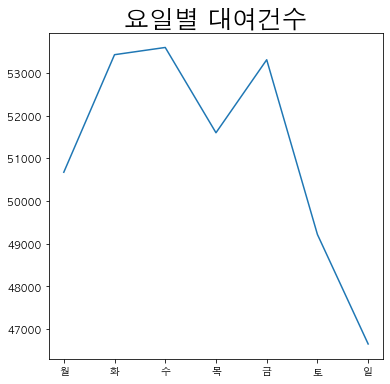

In [9]:
df_day_of_week = df.groupby('day').mean().drop(['month','year'],axis=1)
day = ['월', '화', '수', '목', '금', '토', '일']
plt.figure(figsize=(6,6))
plt.plot(day,df_day_of_week.대여건수)
plt.title("요일별 대여건수",fontsize=25)
plt.show()

In [10]:
dummy_cols = ['year', 'month','day']
rides = pd.get_dummies(df, columns=dummy_cols, drop_first=True)



from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(rides.drop(['대여건수'], axis=1), 
                                                    rides['대여건수'],
                                                    test_size=0.2, 
                                                    random_state=2021 , 
                                                    shuffle=True)


from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(x_train, y_train)
y_pred_train = model1.predict(x_train)
y_pred = model1.predict(x_test)


from sklearn.metrics import mean_squared_error as MSE
rmse_train = MSE(y_train, y_pred_train )**.5
rmse_valid = MSE(y_test, y_pred )**.5
print(f"training set 의 RMSE:       {rmse_train:.2f}")
print(f"test set 의 RMSE:     {rmse_valid:.2f}")
from sklearn.metrics import r2_score
print('r2 score:',r2_score(y_test,y_pred))


training set 의 RMSE:       17456.65
test set 의 RMSE:     18663.57
r2 score: 0.6602672316876659


In [11]:

path_Weather = './기온.csv'
weather = pd.read_csv(path_Weather, encoding='euc-kr')
weather.dropna(inplace=True)

weather = weather.rename(columns=weather.iloc[0])
weather.drop(weather.index[0],inplace=True)

weather.drop('지점',axis=1,inplace=True)
weather['날짜'] = pd.to_datetime(weather['날짜'],format='%Y.%m.%d')
weather['평균기온(℃)'] = weather['평균기온(℃)'].apply(pd.to_numeric)
weather['최저기온(℃)'] = weather['최저기온(℃)'].apply(pd.to_numeric)
weather['최고기온(℃)'] = weather['최고기온(℃)'].apply(pd.to_numeric)

weather.set_index('날짜',inplace=True)

print(weather)


            평균기온(℃)  최저기온(℃)  최고기온(℃)
날짜                                   
2018-01-01     -1.3     -5.1      3.8
2018-01-02     -1.8     -4.3      1.8
2018-01-03     -4.7     -7.1     -0.4
2018-01-04     -4.7     -8.7     -0.7
2018-01-05     -3.0     -5.6      1.6
...             ...      ...      ...
2021-06-26     22.8     19.9     26.7
2021-06-27     24.5     19.8     30.8
2021-06-28     23.7     21.0     29.2
2021-06-29     23.9     21.3     28.4
2021-06-30     24.3     21.0     28.8

[1277 rows x 3 columns]


In [12]:
path_rain = './강수량.csv'
rain = pd.read_csv(path_rain, encoding='euc-kr')
rain = rain.rename(columns=rain.iloc[6])

rain.drop(rain.index[:7],axis=0,inplace=True)
rain.drop('지점',axis=1,inplace=True)

rain['날짜'] = pd.to_datetime(rain['날짜'],format='%Y.%m.%d')
rain['강수량(mm)'] = rain['강수량(mm)'].apply(pd.to_numeric)
rain.set_index('날짜',inplace=True)

rain.fillna(0,inplace=True)

In [13]:
count, bin_r = np.histogram(rain['강수량(mm)'],bins=5)
rain['rain_category'] = pd.cut(rain['강수량(mm)'],
                                bins=bin_r,
                                include_lowest=True)


In [14]:
result = pd.concat([df,weather,rain],axis=1)
result

,대여건수,year,month,day,평균기온(℃),최저기온(℃),최고기온(℃),강수량(mm),rain_category
날짜,,,,,,,,,
2018-01-01,4950.0,2018.0,1.0,0.0,-1.3,-5.1,3.8,0.0,"(-0.001, 20.62]"
2018-01-02,7136.0,2018.0,1.0,1.0,-1.8,-4.3,1.8,0.0,"(-0.001, 20.62]"
2018-01-03,7156.0,2018.0,1.0,2.0,-4.7,-7.1,-0.4,0.0,"(-0.001, 20.62]"
2018-01-04,7102.0,2018.0,1.0,3.0,-4.7,-8.7,-0.7,0.0,"(-0.001, 20.62]"
2018-01-05,7705.0,2018.0,1.0,4.0,-3.0,-5.6,1.6,0.0,"(-0.001, 20.62]"
...,...,...,...,...,...,...,...,...,...
2021-06-26,105813.0,2021.0,6.0,5.0,22.8,19.9,26.7,4.5,"(-0.001, 20.62]"
2021-06-27,92869.0,2021.0,6.0,6.0,24.5,19.8,30.8,38.2,"(20.62, 41.24]"
2021-06-28,106378.0,2021.0,6.0,0.0,23.7,21.0,29.2,0.1,"(-0.001, 20.62]"


In [15]:
result = pd.concat([df,weather,rain],axis=1)
mask = result.대여건수.isnull()
result.drop(result[mask].index, axis=0, inplace=True)

print(result.isnull().sum())
print(result.duplicated().sum())

대여건수             0
year             0
month            0
day              0
평균기온(℃)          0
최저기온(℃)          0
최고기온(℃)          0
강수량(mm)          0
rain_category    0
dtype: int64
0


Text(0, 0.5, '날짜별 따릉이 평균 대여건수')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


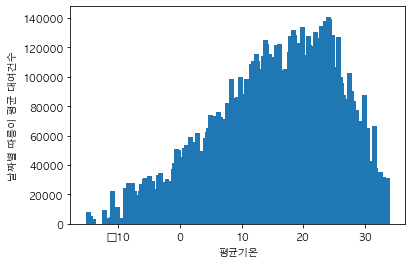

In [16]:
plt.bar(result['평균기온(℃)'],result['대여건수'])
plt.xlabel('평균기온')
plt.ylabel('날짜별 따릉이 평균 대여건수')

In [17]:
count, bin_t = np.histogram(result['평균기온(℃)'],bins=8)
result['temp_category'] = pd.cut(x=result['평균기온(℃)'],
                                bins=bin_t,
                                include_lowest=True)

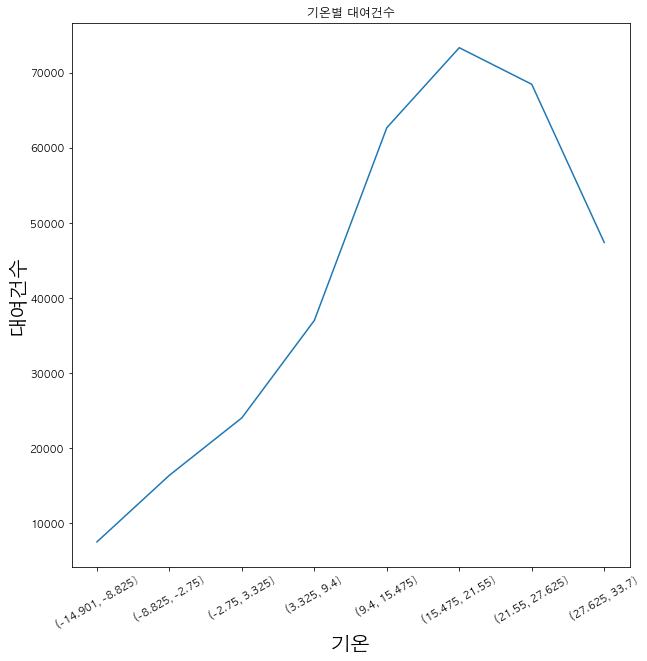

In [18]:
#기온을 범주형 데이터로 변환하여 분석한 결과
plt.figure(figsize=(10,10))
result.groupby('temp_category').mean().대여건수.plot()
plt.xticks(rotation = 30)
plt.xlabel("기온",fontsize=20)
plt.ylabel("대여건수",fontsize=20)
plt.title('기온별 대여건수')
plt.show()

In [19]:
result['강수량(mm)']

날짜
2018-01-01     0.0
2018-01-02     0.0
2018-01-03     0.0
2018-01-04     0.0
2018-01-05     0.0
              ... 
2021-06-26     4.5
2021-06-27    38.2
2021-06-28     0.1
2021-06-29     8.0
2021-06-30     6.0
Name: 강수량(mm), Length: 1246, dtype: float64

Text(0, 0.5, '따릉이 대여건수')

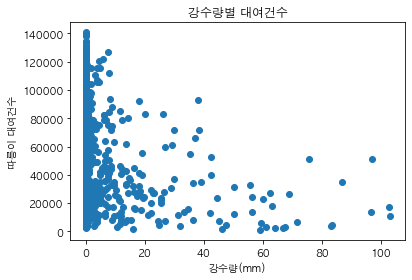

In [28]:
plt.scatter(y=result.대여건수,x= result['강수량(mm)'])
plt.title('강수량별 대여건수')
plt.xlabel('강수량(mm)')
plt.ylabel('따릉이 대여건수')

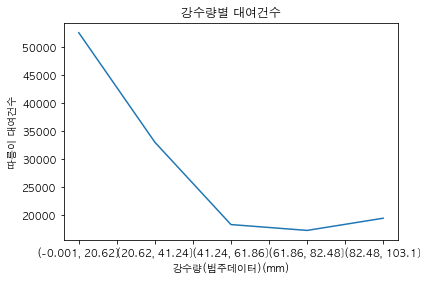

In [29]:
#분석하기 어려움이 있어 강수량을 범주형 데이터로 변화해서 분석
result.groupby('rain_category').mean().대여건수.plot()
plt.title('강수량별 대여건수')
plt.xlabel('강수량(범주데이터)(mm)')
plt.ylabel('따릉이 대여건수')
plt.show()

In [22]:
result

,대여건수,year,month,day,평균기온(℃),최저기온(℃),최고기온(℃),강수량(mm),rain_category,temp_category
날짜,,,,,,,,,,
2018-01-01,4950.0,2018.0,1.0,0.0,-1.3,-5.1,3.8,0.0,"(-0.001, 20.62]","(-2.75, 3.325]"
2018-01-02,7136.0,2018.0,1.0,1.0,-1.8,-4.3,1.8,0.0,"(-0.001, 20.62]","(-2.75, 3.325]"
2018-01-03,7156.0,2018.0,1.0,2.0,-4.7,-7.1,-0.4,0.0,"(-0.001, 20.62]","(-8.825, -2.75]"
2018-01-04,7102.0,2018.0,1.0,3.0,-4.7,-8.7,-0.7,0.0,"(-0.001, 20.62]","(-8.825, -2.75]"
2018-01-05,7705.0,2018.0,1.0,4.0,-3.0,-5.6,1.6,0.0,"(-0.001, 20.62]","(-8.825, -2.75]"
...,...,...,...,...,...,...,...,...,...,...
2021-06-26,105813.0,2021.0,6.0,5.0,22.8,19.9,26.7,4.5,"(-0.001, 20.62]","(21.55, 27.625]"
2021-06-27,92869.0,2021.0,6.0,6.0,24.5,19.8,30.8,38.2,"(20.62, 41.24]","(21.55, 27.625]"
2021-06-28,106378.0,2021.0,6.0,0.0,23.7,21.0,29.2,0.1,"(-0.001, 20.62]","(21.55, 27.625]"


In [23]:
dummy_cols = [ 'month','day','temp_category']
rides = pd.get_dummies(result, columns=dummy_cols, drop_first=True)
rides.drop(['rain_category'],axis=1,inplace=True)



from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(rides.drop(['대여건수'], axis=1), 
                                                    rides['대여건수'],
                                                    test_size=0.2, 
                                                    random_state=2021 , 
                                                    shuffle=True)



from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
model2.fit(x_train, y_train)
y_pred_train = model2.predict(x_train)
y_pred = model2.predict(x_test)


from sklearn.metrics import mean_squared_error as MSE
rmse_train = MSE(y_train, y_pred_train )**.5
rmse_valid = MSE(y_test, y_pred )**.5
print(f"training set 의 RMSE:       {rmse_train:.2f}")
print(f"test set 의 RMSE:     {rmse_valid:.2f}")

from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

training set 의 RMSE:       13006.03
test set 의 RMSE:     13353.47


In [24]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))


0.826085388263369


In [25]:
for i in range(len(x_train.columns)):
    print(f'coef {x_train.columns[i]}:      {model2.coef_[i]:.0f}')
print(model2.intercept_)

coef year:      18160
coef 평균기온(℃):      -718
coef 최저기온(℃):      -1209
coef 최고기온(℃):      2573
coef 강수량(mm):      -763
coef month_2.0:      2030
coef month_3.0:      10417
coef month_4.0:      24532
coef month_5.0:      25681
coef month_6.0:      36954
coef month_7.0:      37239
coef month_8.0:      32884
coef month_9.0:      38352
coef month_10.0:      42788
coef month_11.0:      31771
coef month_12.0:      17825
coef day_1.0:      2026
coef day_2.0:      629
coef day_3.0:      474
coef day_4.0:      -817
coef day_5.0:      -2617
coef day_6.0:      -5277
coef temp_category_(-8.825, -2.75]:      -6277
coef temp_category_(-2.75, 3.325]:      -2950
coef temp_category_(3.325, 9.4]:      -3210
coef temp_category_(9.4, 15.475]:      3408
coef temp_category_(15.475, 21.55]:      10624
coef temp_category_(21.55, 27.625]:      6474
coef temp_category_(27.625, 33.7]:      -12127
-36665768.972118594


In [26]:
for i in ('mean','median','max','min','std'):
    print('서울시 전체 따릉이 대여건 수의 ',i,'값:  ', end='')
    eval("print(df.대여건수."+i+"())")

서울시 전체 따릉이 대여건 수의  mean 값:  51216.352327447836
서울시 전체 따릉이 대여건 수의  median 값:  43419.5
서울시 전체 따릉이 대여건 수의  max 값:  140870.0
서울시 전체 따릉이 대여건 수의  min 값:  1037.0
서울시 전체 따릉이 대여건 수의  std 값:  32478.44674956795
